**МАТЕРИАЛЫ:**

1. Презентация: https://disk.yandex.ru/i/63nxpZS1saawHQ


2. Дашборд: https://public.tableau.com/app/profile/irina.nikolskaya/viz/Bankproducts/Dashboardbankproducts?publish=yes

# Банки - Анализ оттока клиентов

**ВВЕДЕНИЕ:**

Настоящее исследование представляет собой анализ клиентов банка "Метанпром", их сегментирование и проверку гипотез.

**Цель проекта:**
Анализ оттока клиентов, поиск тех сегментов клиентов, которые в наибольшей степени склонны уходить из банка, а также подготовка рекомендаций для отдела маркетинга.

**Задачи проекта:**

- Исследование данных, поиск различных корреляций;
- Составление портретов клиентов;
- Проверка статистических гипотез;
- Составление сегментов клиентов, приоритизация их в соответствии со степенью подверженности оттоку из банка;
- Подготовка выводов и рекомендаций для отдела маркетинга.

**Декомпозиция проекта:**

1. Загрузка данных и импорт необходимых библиотек.


2. Предобработка данных:

- приведение к корректному типу данных;
- проверка на корректность наименований колонок
- проверка на наличие пропусков;
- проверка на наличие дубликатов;
- кодирование данных.

3. Исследовательский анализ данных:

- анализ отточных клиентов в разрезе различных параметров (город, пол, возраст и т.д.);
- составление портретов уходящих клиентов

4. Статистический анализ данных:

- выдвижение первой гипотезы и ее проверка
- выдвижение второй гипотезы и ее проверка
- выдвижение третей гипотезы и ее проверка
- формулирование промежуточных выводов на основе статистического анализа

5. Сегментация пользователей и их приоритизация


6. Итоговые выводы и рекомендации для отдела маркетинга.

## Загрузка данных и импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as st
import math as mth
import warnings
warnings.filterwarnings("ignore")

#столбцы и строки полностью, формат округлен
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
#вывод значений без сокращений
pd.set_option('display.max_colwidth', -1)

In [2]:
# чтение файла bank_scrooge.csv с данными и сохранение его в переменную 
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
df = pd.read_csv(path)

In [3]:
df.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1
5,202305,856.00,Рыбинск,М,56.00,4,"863,687.24",3,1,0,"156,619.80",0
6,177259,807.00,Ярославль,Ж,39.00,3,"405,042.44",3,0,1,"103,838.32",0
7,218868,825.00,Ярославль,Ж,38.00,4,"458,145.40",2,1,1,"68,085.48",0
8,211686,923.00,Ярославль,М,54.00,5,"1,206,337.87",2,1,0,"155,371.79",0
9,133130,906.00,Ярославль,Ж,67.00,0,NaN,1,0,1,"238,055.53",0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


**Вывод:**

После загрузки и ознакомлении с данными мы видим, что названия некоторых столбцов написаны заглавными буквами их необходимо привести к нижнему регистру, также добавим "змеиный регистр" для столбца USERID и EST_SALARY . В столбцах age и  balance присутствуют пропуски.Тип данных соответствует, переходим к предобработке данных.

## Предобработка данных

In [5]:
# приведем названия столбцов к нижнему и "змеиному" регистрам:

df = df.rename (columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'})
df

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00,Рыбинск,М,27.00,1,"78,144.65",1,0,1,"18,943.64",0
9996,139170,894.00,Ярославль,М,46.00,0,NaN,1,1,0,"196,898.29",0
9997,115639,903.00,Ярославль,М,24.00,0,NaN,2,1,1,"108,905.09",0
9998,148700,777.00,Ярославль,Ж,68.00,3,"865,457.97",3,0,1,"86,874.90",0


In [6]:
df.columns = df.columns.str.lower()
df.columns 

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

Определим процент пропущенных значений в столбце balance и age:

In [7]:

df['balance'].isna().sum()/len(df)

0.2295

In [8]:
df['age'].isna().sum()/len(df)

0.0026

Пропуски в столбце balancе составляют 23%, поэтому удалять их было бы некорректно. Можно заменить средним или медианой, однако это может повлиять на результаты дальнейшего анализа, поэтому попробуем исследовать природу этих пропусков. Пропусков в столбце age мало удалим  их, они могут быть связаны с тем , что клиент не захотел заполнять эту графу.

In [9]:
df=df.dropna(subset=['age'])

In [10]:
#переведем значения в целочисленный тип 
df['age']= df['age'].astype('int')
df['age']

0       25
1       37
2       30
3       51
4       34
        ..
9995    27
9996    46
9997    24
9998    68
9999    58
Name: age, Length: 9974, dtype: int64

**Работа с пропусками в столбце balance:**

In [11]:
# Посмотрим, связаны ли пропуски в столбце balance с фактом оттока клиента из банка:

df[df['balance'].isna()]['churn'].value_counts()

0    2266
1    13  
Name: churn, dtype: int64

Как мы видим, лишь в 13 случаях пропуск мог быть связан с тем, что клиент ушел из банка, так что предположение о том, что пропуски связаны с оттоком, не подтвердилось.

In [12]:
df.query('balance.isna()').groupby('city')['city'].count()

city
Ростов       235 
Рыбинск      586 
Ярославль    1458
Name: city, dtype: int64

Пропуски есть во всех городах

Так как нам не удалось однозначно определить природу пропусков, лучше оставить их.

In [13]:
#проверка на наличие дубликатов
df.duplicated().sum()

0

Проверим на наличие дубликатов столбцы, где все значения должны быть уникальными (в нашем случае это столбец user_id).

In [14]:
# найдем дубликаты в столбце user_id:

df['user_id'].duplicated().sum()

50

In [15]:
df['user_id'] = df['user_id'].drop_duplicates().reset_index(drop=True)

In [16]:
# проверим уникальные значения в столбце city

df['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [17]:
# проверим уникальные значения в столбце gender:

df['gender'].unique()

array(['Ж', 'М'], dtype=object)

In [18]:
# проверим уникальные значения в столбце credit_card:

df['credit_card'].unique()

array([0, 1])

In [19]:
# проверим уникальные значения в столбце last_activity:

df['last_activity'].unique()

array([1, 0])

In [20]:
# проверим уникальные значения в столбце churn:

df['churn'].unique()

array([1, 0])

**Кодирование данных:**

Для дальнейшего анализа нам необходимо будет кодировать некоторые столбцы, то есть перевести категориальные значения в бинарные.

In [21]:
# создаем копии столбцов city и gender:

df['city_2']=df['city']
df['gender_2']=df['gender']
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_2,gender_2
0,"183,012.00",850.00,Рыбинск,Ж,25,1,"59,214.82",2,0,1,"75,719.14",1,Рыбинск,Ж
1,"146,556.00",861.00,Рыбинск,Ж,37,5,"850,594.33",3,1,0,"86,621.77",0,Рыбинск,Ж
2,"120,722.00",892.00,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.34",0,Рыбинск,Ж
3,"225,363.00",866.00,Ярославль,Ж,51,5,"1,524,746.26",2,0,1,"174,423.53",1,Ярославль,Ж
4,"157,978.00",730.00,Ярославль,М,34,5,174.00,1,1,0,"67,353.16",1,Ярославль,М


In [22]:
# кодируем данные в столбцах city_2 и gender_2:

df = pd.get_dummies(df, columns = ['city_2', 'gender_2'])
df = df.rename (
    columns = ({
        'city_2_Ростов':'Ростов', 'city_2_Рыбинск':'Рыбинск','city_2_Ярославль':'Ярославль', 
        'gender_2_Ж':'female', 'gender_2_М':'male'}))
display (df.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
0,"183,012.00",850.00,Рыбинск,Ж,25,1,"59,214.82",2,0,1,"75,719.14",1,0,1,0,1,0
1,"146,556.00",861.00,Рыбинск,Ж,37,5,"850,594.33",3,1,0,"86,621.77",0,0,1,0,1,0
2,"120,722.00",892.00,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.34",0,0,1,0,1,0
3,"225,363.00",866.00,Ярославль,Ж,51,5,"1,524,746.26",2,0,1,"174,423.53",1,0,0,1,1,0
4,"157,978.00",730.00,Ярославль,М,34,5,174.00,1,1,0,"67,353.16",1,0,0,1,0,1


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,"9,898.00","171,745.27","33,699.06","94,561.00","142,730.25","172,643.00","201,163.75","229,145.00"
score,"9,974.00",848.68,65.40,642.00,802.00,853.00,900.00,"1,000.00"
age,"9,974.00",42.73,12.18,18.00,33.00,40.00,51.00,86.00
equity,"9,974.00",2.63,1.98,0.00,0.00,3.00,4.00,9.00
balance,"7,695.00","827,245.59","1,980,327.41",0.00,"295,698.71","524,295.33","980,051.21","119,113,552.01"
products,"9,974.00",1.87,0.79,0.00,1.00,2.00,2.00,5.00
credit_card,"9,974.00",0.68,0.47,0.00,0.00,1.00,1.00,1.00
last_activity,"9,974.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
est_salary,"9,974.00","147,786.81","139,285.51","2,546.30","75,251.66","119,626.79","174,499.81","1,395,064.45"
churn,"9,974.00",0.18,0.39,0.00,0.00,0.00,0.00,1.00


При ознакомлении мы видим минимальное значение в столбце products - 0. Если человек является клиентом банка, то значит он пользуется как минимум одним продуктом.

In [24]:
#посмотрим на эту строку
df[df['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
8957,"152,499.00",962.00,Рыбинск,Ж,79,3,NaN,0,0,0,"25,063.96",1,0,1,0,1,0


Судя по всему, 0 в столбце products появился потому что этот клиент ушел из банка и теперь действительно больше не пользуется банковскими продуктами.

**Предварительно, можно сделать следующие выводы:**

- возраст клиентов колеблется от 18 до 86 лет;
- клиент может как не иметь недвижимость в собственности так и владеть 9 объектами;
- есть клиенты,которые не пользуются продуктами банка,они ушли из банка, а есть те кто пользуется пятью;
- 68% клиентов пользуется кредитной картой банка;
- почти половина клиентов не является активными пользователями продуктов;
- отток составляет 18%.

## Исследовательский анализ данных

Построим графики распределения признаков из нашей таблицы:

In [25]:
#функция для формирования графиков распределения:
#df - датафрейм, на основе которого строится распределение
#hue- признак, по которому мы хотим увидеть детализацию данных

def tables(data, hue=None):
    #дискретные значения
    for column in ['city','gender', 'credit_card', 'last_activity', 'equity', 'products', 'churn']:
        ax = sns.countplot(data=data, x=column, hue=hue);
        plt.title(f'Распределение клиентов по признаку {column}', fontsize = 16, color = 'black')
        plt.show()
    
    plt.figure(figsize=(16,7))
    sns.countplot(data=data, x='age', hue=hue);
    plt.title('Распределение клиентов по признаку age', fontsize = 16, color = 'black')
    plt.xticks(rotation = 45)
    plt.show()

    #непрерывные значения
    for column in ['score',  'balance', 'est_salary']:
        sns.kdeplot(data=data, x=column, hue=hue);
        plt.title(f'Распределение клиентов по признаку {column}', fontsize = 16, color = 'black')
        plt.show()

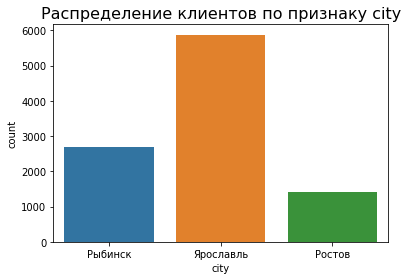

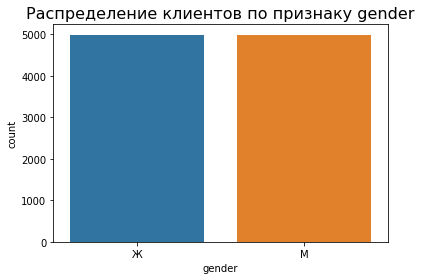

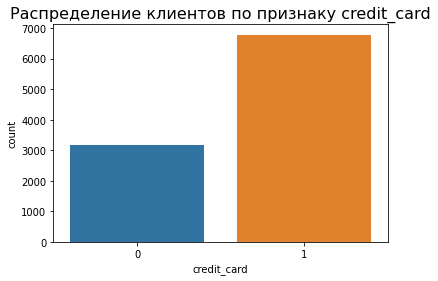

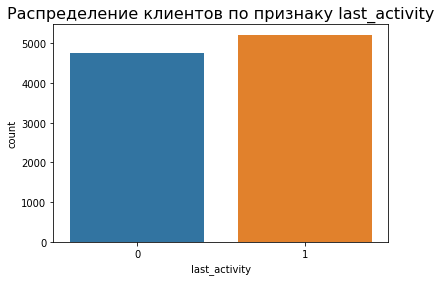

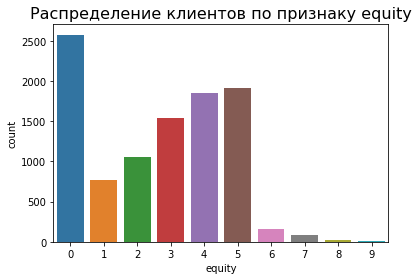

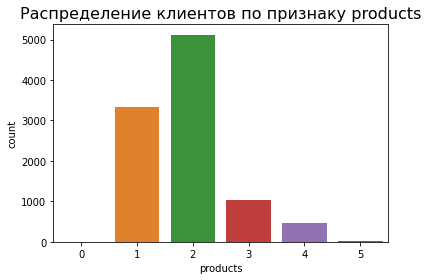

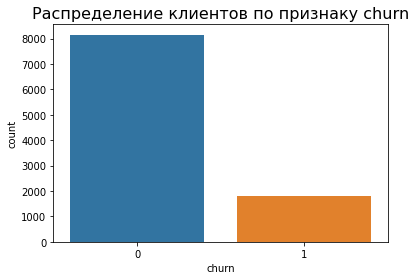

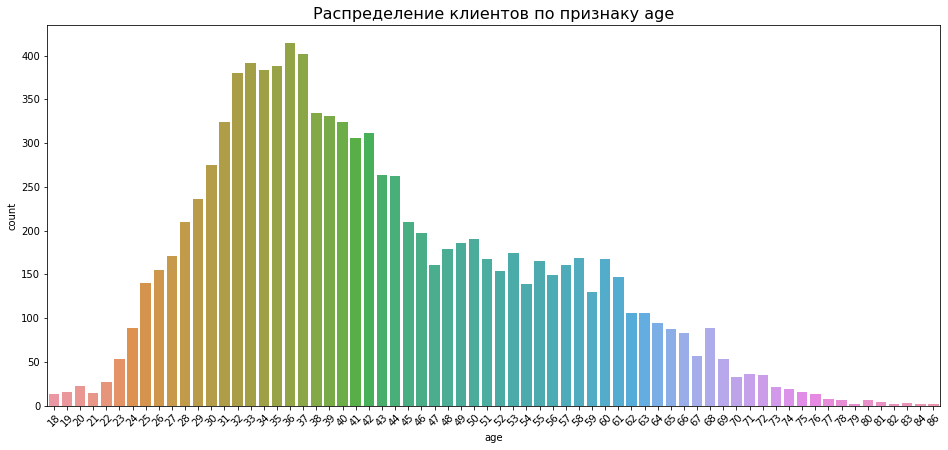

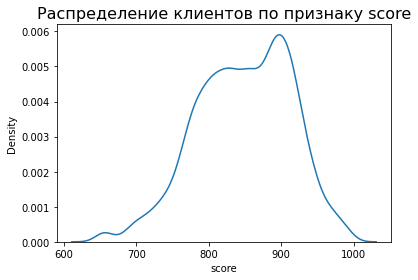

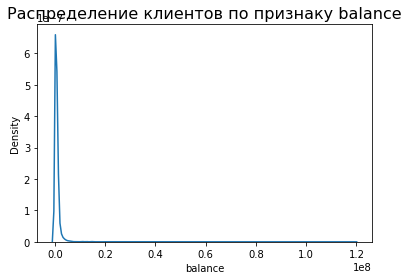

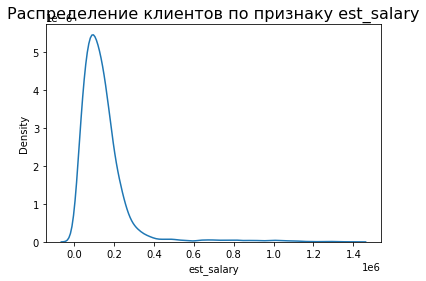

In [26]:
#формируем визуализацию
tables(df, hue=None) 

**Из приведенных графиков видно, что:**

1. В Ярославле находится самый крупный филиал банка, там обслуживается около 6000 клиентов;
2. Среди клиентов женщин и мужчин  одинаковое количество;
3. Кредитными картами пользуется большая часть клиентов;
4. Активных клиентов немного больше, чем не активных;
5. Количество объектов в собственности распределено неравномерно, много клиентов без всякой собственности, около 2 тыс. клиентов имеют в собственности 4-5 объектов;
6. Подавляющее количество клиентов пользуются 2 продуктами.

Посмотрим, коррелируют ли какие-либо признаки между собой:

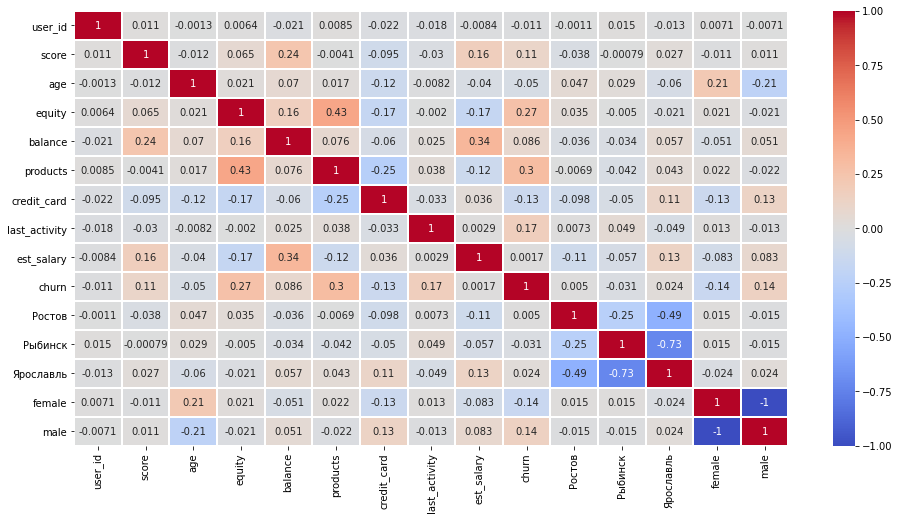

In [27]:
# вызовем метод corr(), чтобы найти коэффициент корреляции для всех столбцов, и построим тепловую карту:

plt.figure(figsize=(16,8))
sns.heatmap (df.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1);

По таблице видно, что признаки не коррелируют между собой либо корреляция слабая:

- оценка объектов собственности клиента (столбец equity) и количество продуктов(products) 43%,
- оценка объектов собственности клиента (столбец equity) и churn 27%
- скоринговый рейтинг клиента (столбец score)  и balance 24%,
- количество продуктов, которыми пользуется клиент (столбец products) и  churn 30%,
- наличие кредитной карты (столбец credit_card) и products имеют отрицательную корреляцию (-25%),
- пол пользователя (столбцы female и male) и возраст ( у женщин 21% у мужчин -21%)


### Распределение признаков относительно оттока клиентов
Общее количество клиентов по признаку оттока:

In [28]:
churn_group = df.groupby('churn')['churn'].count()
churn_group.columns = ['churn_cnt']
churn_group

churn
0    8155
1    1819
Name: churn, dtype: int64

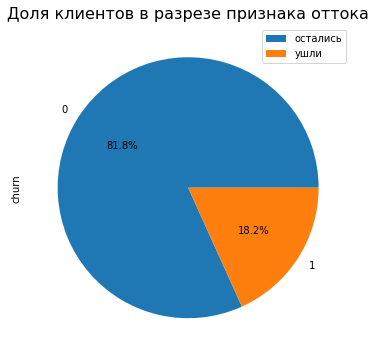

In [29]:
#строим круговую диаграмму
churn_group.plot(kind = 'pie', y ='churn_cnt', autopct='%1.1f%%', figsize= (6,6),
                       );
plt.title('Доля клиентов в разрезе признака оттока', fontsize = 16)
plt.legend(['остались', 'ушли'])
plt.show()

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток (1) и тех, кто остался (0).

In [30]:
df.groupby(['churn'])['score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'].mean()

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
churn,,,,,,,,,
0,845.40,43.02,2.38,"733,031.63",1.76,0.71,0.48,"147,674.64",0.00
1,863.42,41.45,3.76,"1,134,458.21",2.38,0.55,0.70,"148,289.70",1.00


1. У тех, кто остался, баллы кредитного скоринга ниже (но не сильно);
2. Средний возраст клиентов, попавших в отток, - 41 год, у оставшихся - 43 года;
3. Количество объектов собственности у оставшихся клиентов ниже почти в 2 раза;
4. Баланс на счете у клиентов попавших в отток больше на 30%
5. Активные клиенты в 2 раза чаще попадают в отток.
6. Количество используемых продуктов,наличие кредитной карты, ЗП на отток существенного влияния не оказывают (в обеих группах показатели практически одинаковые).

### Рассмотрим эти параметры по отдельности.

#### Баллы кредитного скоринга клиента

In [31]:
# Рассчитаем процент ушедших клиентов в разбивке по баллам кредитного скоринга от общего числа:

score_churn = df.pivot_table (index = 'score', values = 'churn', aggfunc =['sum', 'count'])
score_churn.columns = score_churn.columns.droplevel(level=1)
score_churn ['perc'] = score_churn['sum']/score_churn['count']*100
score_churn = score_churn [score_churn['sum']==1]

score_churn

,sum,count,perc
score,,,
706.00,1,11,9.09
707.00,1,6,16.67
727.00,1,12,8.33
728.00,1,9,11.11
730.00,1,8,12.50
733.00,1,14,7.14
736.00,1,8,12.50
737.00,1,13,7.69
739.00,1,15,6.67


До значениями баллов кредитного скоринга равного 750, наблюдалась тенденция к снижению вероятности ухода клиента, однако после процент ушедших клиентов вновь стал расти.

#### Возраст пользователей

In [32]:
# Рассчитаем процент ушедших клиентов в разбивке по возрасту от общего числа:

age_churn = df.pivot_table (index = 'age', values = 'churn', aggfunc =['sum', 'count'])
age_churn.columns = age_churn.columns.droplevel(level=1)
age_churn ['perc'] = age_churn['sum']/age_churn['count']*100

age_churn

,sum,count,perc
age,,,
18,1,13,7.69
19,1,16,6.25
20,3,23,13.04
21,4,15,26.67
22,4,27,14.81
...,...,...,...
81,0,4,0.00
82,0,2,0.00
83,0,3,0.00


Большинство по оттоку - пользователи в возрасте от 25-45 лет и  от 46 до 62 лет, среди них более 20-30 % отточных. 

#### Оценка объектов собственности

In [33]:
# Рассчитаем процент ушедших клиентов в разбивке по количеству баллов собственности от общего числа:

equity_churn = df.pivot_table (index = 'equity', values = 'churn', aggfunc = ['sum', 'count'])
equity_churn.columns = equity_churn.columns.droplevel(level=1)
equity_churn ['perc'] = equity_churn['sum']/equity_churn['count']*100

equity_churn

,sum,count,perc
equity,,,
0,90,2576,3.49
1,93,773,12.03
2,166,1051,15.79
3,322,1541,20.90
4,464,1847,25.12
5,576,1915,30.08
6,58,161,36.02
7,37,80,46.25
8,6,17,35.29


Чем выше количество баллов собственности, тем больше процент отточных клиентов (от 3,5% для оценки 0 до почти 54% для оценки 9)

#### Количество используемых продуктов

In [34]:
# Рассчитаем процент ушедших клиентов в разбивке по количеству используемых продуктов от общего числа:

products_churn = df.pivot_table (index = 'products', values = 'churn', aggfunc = ['sum', 'count'])
products_churn.columns = products_churn.columns.droplevel(level=1)
products_churn ['perc'] = products_churn['sum']/products_churn['count']*100

products_churn

,sum,count,perc
products,,,
0,1,1,100.00
1,235,3323,7.07
2,978,5119,19.11
3,297,1038,28.61
4,300,474,63.29
5,8,19,42.11


 63% клиентов, использовавших 4 продукта, ушли из банка. Среди клиентов, использовавших 5 продуктов доля отточных составляет 40%, для клиентов, использовавших 2-3 продукта отток составил 20-30%, 1 продукт - менее 10%.

#### Наличие кредитной карты

In [35]:
# Рассчитаем процент ушедших клиентов в разбивке по наличию или отсутствию кредитной карты:

credit_card_churn = df.pivot_table (index = 'credit_card', values = 'churn', aggfunc = ['sum', 'count'])
credit_card_churn.columns = credit_card_churn.columns.droplevel(level=1)
credit_card_churn ['perc'] = credit_card_churn['sum']/credit_card_churn['count']*100

credit_card_churn

,sum,count,perc
credit_card,,,
0,816,3190,25.58
1,1003,6784,14.78


Среди клиентов, у которых есть кредитная карта, отток почти в 2 раза меньше (15%), против (26%) среди тех, у кого кредитной карты нет.

#### Пользовательская активность

In [36]:
# Рассчитаем процент ушедших клиентов в разбивке по активности от общего числа:

activity_churn = df.pivot_table (index = 'last_activity', values = 'churn', aggfunc = ['sum', 'count'])
activity_churn.columns = activity_churn.columns.droplevel(level=1)
activity_churn ['perc'] = activity_churn['sum']/activity_churn['count']*100

activity_churn

,sum,count,perc
last_activity,,,
0,542,4759,11.39
1,1277,5215,24.49


У активных клиентов риск оттока более чем в 2 раза больше (24%), чем у неактивных (11%). Возможно это связано с тем, что активное использование банковских продуктов повышает вероятность получения негативного опыта от взаимодействия с банком, и, как следствие - принятию решения об отказе от услуг банка.

#### Пол пользователя

In [37]:
# Рассчитаем процент ушедших клиентов в разбивке по полу от общего числа:

gender_churn = df.pivot_table (index = 'gender', values = 'churn', aggfunc = ['sum', 'count'])
gender_churn.columns = gender_churn.columns.droplevel(level=1)
gender_churn ['perc'] = gender_churn['sum']/gender_churn['count']*100


gender_churn

,sum,count,perc
gender,,,
Ж,636,4983,12.76
М,1183,4991,23.70


Среди мужчин доля отточных клиентов почти в два раз выше (24%), чем среди женщин (13%). 

#### Город

In [38]:
# Рассчитаем процент ушедших клиентов в разбивке по городам от общего числа:

city_churn = df.pivot_table (index = 'city', values = 'churn', aggfunc =['sum', 'count'])
city_churn.columns = city_churn.columns.droplevel(level=1)
city_churn ['perc'] = city_churn['sum']/city_churn['count']*100

city_churn

,sum,count,perc
city,,,
Ростов,265,1416,18.71
Рыбинск,437,2683,16.29
Ярославль,1117,5875,19.01


Различие в долях ушедших клиентов между городами незначительное, можно предположить, что отток клиентов между городами происходил равномерно.

**Теперь сделаем визуализвцию наших признаков:**

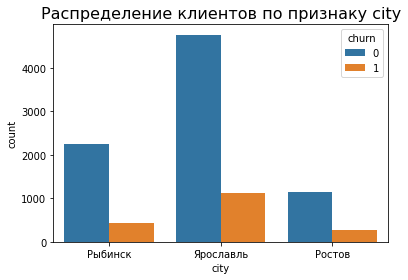

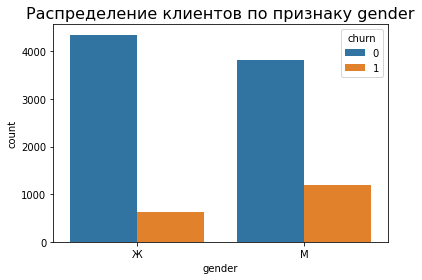

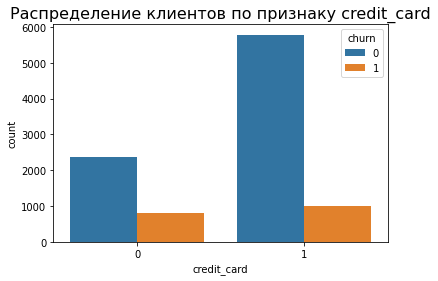

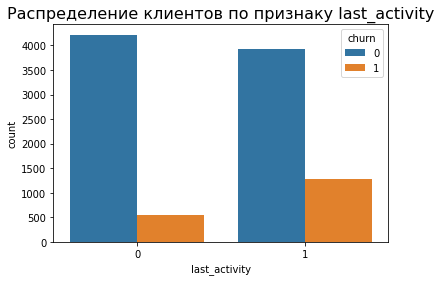

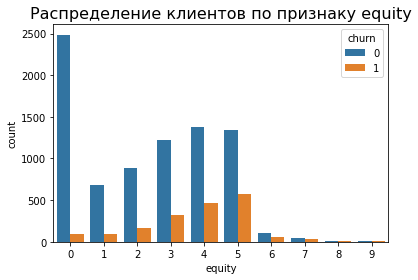

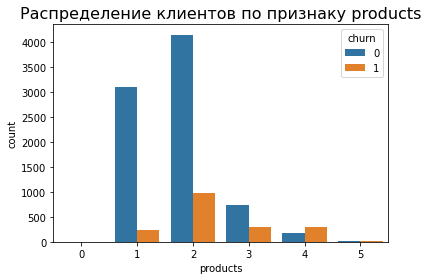

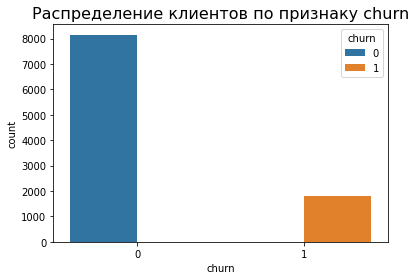

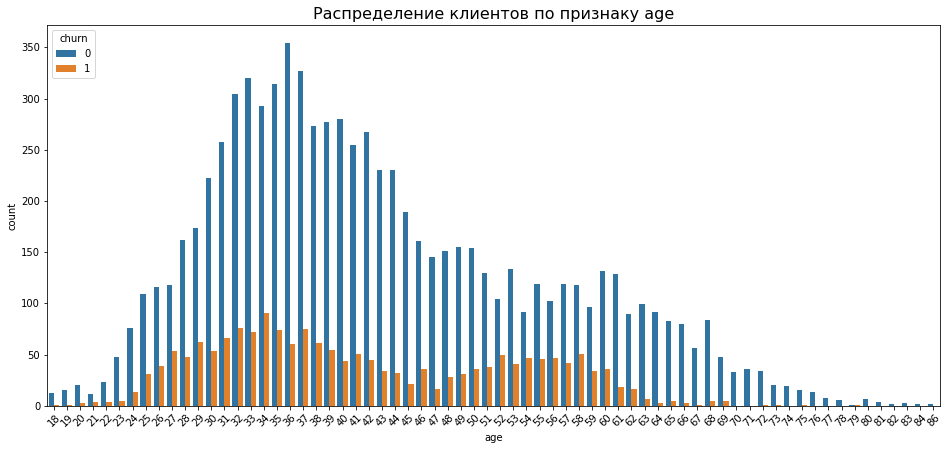

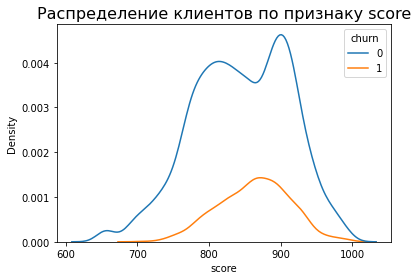

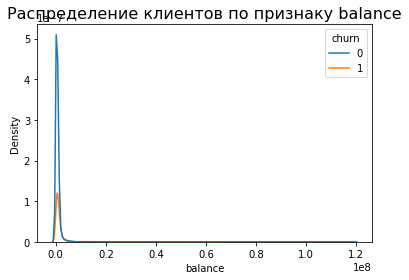

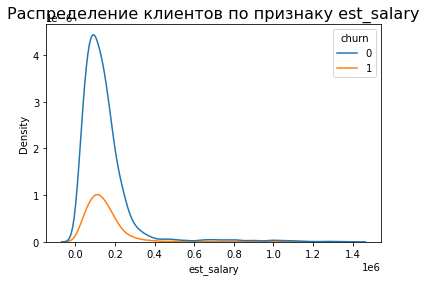

In [39]:
tables(df, hue='churn')    

**Вывод:**

1. Различие в долях ушедших клиентов между городами незначительное.

2. Среди мужчин доля отточных клиентов почти в два раз выше (24%), чем среди женщин (13%).

3. Среди клиентов, у которых есть кредитная карта, отток почти в 2 раза меньше (15%), против (26%) среди тех, у кого кредитной карты нет.

4. У активных клиентов процент оттока более чем в 2 раза больше (24%), чем у неактивных (11%).

5. Чем больше количество баллов собственности, тем больше процент отточных клиентов(от 3,5% для оценки 0 до почти 54% для оценки 9).

6. 63% клиентов, использовавших 4 продукта, ушли из банка. Среди клиентов, использовавших 2-3 продукта отток составил 20-30%, 1 продукт - менее 10%.

7. Общая доля оттока составляет 18% от общего количества пользователей.

8. Большинство по оттоку - пользователи в возрасте от 25-45 лет и от 46 до 62 лет, среди них более 20-30 % отточных.

9. До значениями баллов кредитного скоринга равного 750, наблюдалась тенденция к снижению вероятности ухода клиента, однако после процент ушедших клиентов вновь стал расти.

### Составление портретов уходящих клиентов

По результатам нашего анализа и расчетов корреляции мы можем выделить несколько портретов отточных пользователей:

**Портрет №1**

Пол: мужской

Возраст: 46-62

Город: любой

Количество баллов собственности: 5 и выше

Баллы кредитного скоринга: 750 и выше

Количество используемых продуктов: 3 и больше

Наличие кредитной карты: нет

Пользовательская активность: да

Теперь найдем всех клиентов, удовлетворяющих этим критериям:

In [40]:
portrait_1 = df.query (
    'male==1 and equity>=5 and score >= 750 and credit_card==0 and last_activity==1 and age>46 \
    and age<= 62 and products >= 3 and churn==1') 
portrait_1

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
399,"212,030.00",867.00,Ярославль,М,59,5,"851,896.68",3,0,1,"50,771.03",1,0,0,1,0,1
1292,"119,694.00",826.00,Ярославль,М,60,5,"737,821.34",3,0,1,"98,134.05",1,0,0,1,0,1
1420,"140,006.00",899.00,Ярославль,М,59,5,"1,682,723.25",3,0,1,"866,547.65",1,0,0,1,0,1
1711,"136,965.00",870.00,Ярославль,М,52,5,"775,269.74",3,0,1,"114,384.63",1,0,0,1,0,1
2623,"221,218.00",978.00,Рыбинск,М,53,6,"2,582,959.96",4,0,1,"337,094.41",1,0,1,0,0,1
2688,"203,563.00",832.00,Ярославль,М,55,5,"585,528.59",3,0,1,"56,980.75",1,0,0,1,0,1
2822,"159,768.00",920.00,Ярославль,М,61,5,"1,821,523.00",3,0,1,"202,960.63",1,0,0,1,0,1
3267,"193,795.00",890.00,Ярославль,М,54,5,"3,582,411.37",3,0,1,"96,882.21",1,0,0,1,0,1
3861,"114,000.00",924.00,Ярославль,М,55,5,"1,675,198.33",3,0,1,"89,820.72",1,0,0,1,0,1
4083,"170,917.00",927.00,Ярославль,М,57,7,"3,134,542.35",3,0,1,"93,364.21",1,0,0,1,0,1


**Портрет №2**

Пол: женский

Возраст: 46-62

Город: любой

Количество баллов собственности: 5 и выше

Баллы кредитного скоринга: 750 и выше

Количество используемых продуктов: 3 и больше

Наличие кредитной карты: нет

Пользовательская активность: да

In [41]:
portrait_2 = df.query (
    'female==1 and equity>=5 and score >= 750 and credit_card==0 and last_activity==1 and age>46 \
    and age<= 62 and products >= 3 and churn==1') 
portrait_2

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
148,"122,769.00",868.00,Ростов,Ж,58,5,"1,334,745.59",4,0,1,"63,049.60",1,1,0,0,1,0
859,"177,840.00",802.00,Рыбинск,Ж,51,5,"1,146,872.86",3,0,1,"77,888.51",1,0,1,0,1,0
1205,"213,664.00",807.00,Ярославль,Ж,54,5,"478,592.43",3,0,1,"64,332.46",1,0,0,1,1,0
3718,"215,065.00",889.00,Ярославль,Ж,60,5,"725,760.89",4,0,1,"65,348.47",1,0,0,1,1,0
4134,"129,750.00",856.00,Ярославль,Ж,52,5,"1,700,165.08",4,0,1,"153,066.02",1,0,0,1,1,0
4514,"153,823.00",936.00,Ярославль,Ж,61,5,"3,301,164.33",4,0,1,"221,264.13",1,0,0,1,1,0
5016,"140,474.00",885.00,Ярославль,Ж,55,5,"1,316,966.94",3,0,1,"97,938.30",1,0,0,1,1,0
6105,"128,624.00",868.00,Ярославль,Ж,59,5,"1,548,910.65",3,0,1,"122,215.94",1,0,0,1,1,0
6697,"217,564.00",751.00,Ярославль,Ж,58,5,"364,867.65",3,0,1,"68,001.69",1,0,0,1,1,0
7047,"136,469.00",774.00,Ярославль,Ж,51,5,"1,620,179.14",3,0,1,"100,706.50",1,0,0,1,1,0


**Портрет №3**

Пол: любой

Возраст: от 46 до 62

Город: любой

Количество баллов собственности: менее 5

Баллы кредитного скоринга: 750 и выше

Количество используемых продуктов: 3 и больше

Наличие кредитной карты: нет

Пользовательская активность: да

In [42]:
portrait_3 = df.query (
    'score >= 750 and credit_card==0 and equity < 5 and last_activity==1 and age>=46 \
    and age <62 and products >= 3 and churn==1') 
portrait_3

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
927,"142,574.00",908.00,Ярославль,Ж,56,4,"1,169,266.23",3,0,1,"195,082.49",1,0,0,1,1,0
1359,"186,222.00",833.00,Ярославль,М,55,3,"1,231,184.90",4,0,1,"187,758.38",1,0,0,1,0,1
1748,"162,532.00",832.00,Ярославль,Ж,46,2,"395,500.59",3,0,1,"137,406.75",1,0,0,1,1,0
1851,"156,107.00",837.00,Ярославль,М,53,3,"1,404,105.68",3,0,1,"174,439.78",1,0,0,1,0,1
1893,"214,292.00",883.00,Рыбинск,Ж,55,1,"362,756.49",3,0,1,"175,920.48",1,0,1,0,1,0
2236,"168,914.00",810.00,Ярославль,М,54,4,"761,640.30",3,0,1,"37,346.60",1,0,0,1,0,1
2594,"225,743.00",804.00,Ярославль,Ж,48,4,"911,148.51",3,0,1,"81,718.23",1,0,0,1,1,0
2911,"162,662.00",905.00,Ярославль,Ж,52,3,"1,383,614.66",4,0,1,"124,762.54",1,0,0,1,1,0
3020,"121,287.00",926.00,Ярославль,Ж,52,4,"2,488,753.54",3,0,1,"156,934.62",1,0,0,1,1,0
3035,"120,417.00",881.00,Ярославль,Ж,50,4,"511,237.34",3,0,1,"161,387.90",1,0,0,1,1,0


**Портрет №4**

Пол: любой

Возраст: от 25 до 45

Город: любой

Количество баллов собственности: 5 и выше

Баллы кредитного скоринга: 750 и выше

Количество используемых продуктов: 3 и больше

Наличие кредитной карты: нет

Пользовательская активность: да

In [43]:
portrait_4 = df.query (
    'score >= 750 and credit_card==0 and equity < 5 and last_activity==1 and age>=25 \
    and age <45 and products >= 3 and churn==1') 
portrait_4

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
177,"147,950.00",899.00,Ярославль,М,37,4,"2,229,215.25",3,0,1,"304,260.47",1,0,0,1,0,1
238,"150,336.00",929.00,Рыбинск,Ж,34,4,"1,514,214.91",4,0,1,"137,713.02",1,0,1,0,1,0
790,"170,312.00",901.00,Ярославль,М,33,4,"3,276,783.93",3,0,1,"358,700.96",1,0,0,1,0,1
1080,"155,872.00",896.00,Ярославль,М,36,3,"1,113,656.92",3,0,1,"291,176.85",1,0,0,1,0,1
1154,"120,353.00",917.00,Ярославль,Ж,35,4,"1,140,820.67",3,0,1,"179,686.61",1,0,0,1,1,0
1251,"174,186.00",895.00,Ярославль,Ж,28,4,"709,261.64",3,0,1,"121,559.99",1,0,0,1,1,0
1307,"150,578.00",874.00,Ярославль,М,40,4,"1,391,610.04",3,0,1,"241,242.16",1,0,0,1,0,1
1383,"175,753.00",836.00,Ярославль,Ж,35,3,"449,115.15",3,0,1,"74,213.80",1,0,0,1,1,0
1406,"220,449.00",861.00,Ярославль,Ж,38,2,"759,193.77",3,0,1,"157,004.47",1,0,0,1,1,0
1909,"224,468.00",938.00,Ярославль,Ж,38,4,"2,364,735.93",3,0,1,"172,840.10",1,0,0,1,1,0


**Портрет №5**

Пол: мужской

Возраст: 25-45

Город: любой

Количество баллов собственности: 5 и выше

Баллы кредитного скоринга: 750 и выше

Количество используемых продуктов: 3 и больше

Наличие кредитной карты: да

Пользовательская активность: да

In [44]:
portrait_5 = df.query (
    'male==1 and equity>=5 and score >= 750 and credit_card==1 and last_activity==1 and age>=25 \
    and age<=45 and products >= 3 and churn==1') 
portrait_5

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
370,"221,249.00",803.00,Рыбинск,М,42,7,"458,193.57",4,1,1,"83,086.65",1,0,1,0,0,1
864,"208,809.00",838.00,Ростов,М,32,6,"239,613.03",4,1,1,"111,325.78",1,1,0,0,0,1
928,"220,254.00",838.00,Ярославль,М,35,5,"1,284,094.43",4,1,1,"179,323.18",1,0,0,1,0,1
1330,"153,741.00",900.00,Ярославль,М,35,5,"3,971,985.11",4,1,1,"820,180.64",1,0,0,1,0,1
1539,"136,049.00",890.00,Ярославль,М,32,5,"1,938,963.26",4,1,1,"158,240.78",1,0,0,1,0,1
1652,"203,154.00",893.00,Рыбинск,М,26,5,"703,073.41",4,1,1,"74,090.92",1,0,1,0,0,1
1804,"214,501.00",911.00,Рыбинск,М,44,5,"1,515,849.26",4,1,1,"213,884.72",1,0,1,0,0,1
1862,"225,724.00",897.00,Ярославль,М,29,5,"1,176,545.37",4,1,1,"186,138.06",1,0,0,1,0,1
1970,"167,309.00",845.00,Ярославль,М,29,5,"733,098.45",4,1,1,"41,443.01",1,0,0,1,0,1
2499,"202,156.00",948.00,Ярославль,М,41,5,"3,095,721.85",4,1,1,"307,234.69",1,0,0,1,0,1


**Портрет №6**

Пол: женский

Возраст: 25-45

Город: любой

Количество баллов собственности: 5 и выше

Баллы кредитного скоринга: 750 и выше

Количество используемых продуктов: 3 и больше

Наличие кредитной карты: да

Пользовательская активность: да

In [45]:
portrait_6 = df.query (
    'female==1 and equity>=5 and score >= 750 and credit_card==1 and last_activity==1 and age>=25 \
    and age<=45 and products >= 3 and churn==1') 
portrait_6

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
385,"114,349.00",898.00,Рыбинск,Ж,41,5,"572,927.93",4,1,1,"76,930.63",1,0,1,0,1,0
523,"195,914.00",852.00,Ярославль,Ж,39,5,"1,388,255.70",5,1,1,"135,432.48",1,0,0,1,1,0
1382,"143,947.00",906.00,Рыбинск,Ж,34,5,"1,288,431.87",4,1,1,"185,920.85",1,0,1,0,1,0
1784,"220,800.00",910.00,Ярославль,Ж,38,5,"2,117,755.34",4,1,1,"242,409.75",1,0,0,1,1,0
2227,"228,095.00",888.00,Ярославль,Ж,26,5,"336,864.58",4,1,1,"16,502.70",1,0,0,1,1,0
2800,"133,896.00",797.00,Ярославль,Ж,33,5,"1,053,977.67",4,1,1,"92,072.17",1,0,0,1,1,0
2989,"96,679.00",918.00,Ярославль,Ж,37,5,"1,366,382.35",4,1,1,"97,932.95",1,0,0,1,1,0
2990,"225,234.00",934.00,Ярославль,Ж,37,5,"2,894,230.30",4,1,1,"252,071.75",1,0,0,1,1,0
3133,"200,856.00",876.00,Ярославль,Ж,39,5,"1,497,303.86",4,1,1,"220,384.96",1,0,0,1,1,0
3842,"155,694.00",864.00,Ярославль,Ж,32,5,"1,930,019.02",4,1,1,"304,020.85",1,0,0,1,1,0


Составили предварительные портреты пользователей, склонных к оттоку. Для более точной сегментации пользователей, проведем статистический анализ и проверим нескольких гипотез.

##  Статистический анализ данных

### Проверка гипотезы о различия дохода между теми клиентами, которые ушли и теми, которые остались.

Сформулируем нулевую и альтернативную гипотезы:

Н0: Между клиенатами, которые ушли и теми, которые остались нет статистически значимого различия доходов

Н1: Между клиентами есть статистически значимое различие доходов

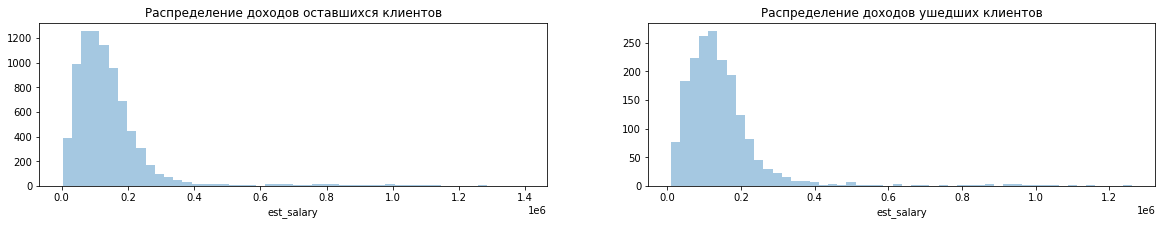

In [46]:
# посмотрим на распределение выборок
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,3))

sns.distplot(df.query('churn == 0')['est_salary'], kde=False, ax=ax1)
ax1.set_title("Распределение доходов оставшихся клиентов")

sns.distplot(df.query('churn == 1')['est_salary'], kde=False, ax=ax2)
ax2.set_title("Распределение доходов ушедших клиентов")

plt.show()

В данном случае рассматривается гипотеза о равенстве между собой средних двух генеральных совокупностей. Значения в выборках распределены равномерно. Поэтому используем специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам ttest_ind

In [47]:
# results = вызов метода для проверки гипотезы

results = st.ttest_ind (
    df[df['churn']==0]['est_salary'],
    df[df['churn']==1]['est_salary'], equal_var = False)

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу
 
print("p-value = ",results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')
       

p-value =  0.8515799588935961
Не получилось отвергнуть нулевую гипотезу


p-value значительно больше принятого уровня статической значимости (0.05), нулевая гипотеза не отвергнута, между клиенатами которые ушли и теми, которые остались нет статистически значимого различия доходов.

### Проверка гипотезы о различие в количестве баллов собственности  отточных и оставшихся клиентов

Сформулируем нулевую и альтернативную гипотезы:

H0: Между клиенатами, которые ушли и теми, которые остались нет статистически значимого различия в количестве баллов собственности

H1: Между клиентами есть статистически значимое различие в количестве баллов собственности

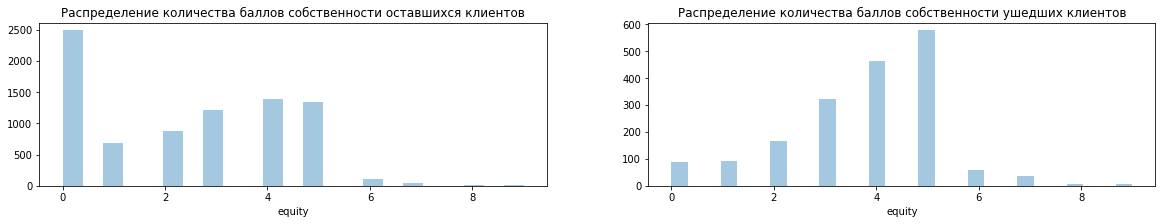

In [48]:
# посмотрим на распределение выборок
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,3))

sns.distplot(df.query('churn == 0')['equity'], kde=False, ax=ax1)
ax1.set_title("Распределение количества баллов собственности оставшихся клиентов")

sns.distplot(df.query('churn == 1')['equity'], kde=False, ax=ax2)
ax2.set_title("Распределение количества баллов собственности ушедших клиентов")

plt.show()

In [49]:
# results = вызов метода для проверки гипотезы

results = st.ttest_ind (
    df[df['churn']==0]['equity'],
    df[df['churn']==1]['equity'], equal_var = False)

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу
 
print("p-value = ",results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')
       

p-value =  2.0104399828205813e-196
Отвергаем нулевую гипотезу


p-value значительно меньше принятого уровня статической значимости (0.05), нулевая гипотеза отвергнута, между клиентами которые ушли и теми, которые остались есть статистически значимое различие в количестве баллов собственности.Эти результаты совпадают с результатами исследовательского анализа.

### Проверка гипотезы о различии в количестве используемых банковских продуктов

Сформулируем нулевую и альтернативную гипотезы:

H0: Между клиенатами, которые ушли и теми, которые остались нет статистически значимого различия в количестве используемых банковских продуктов

H1: Между клиентами есть статистически значимое различие в количестве используемых банковских продуктов

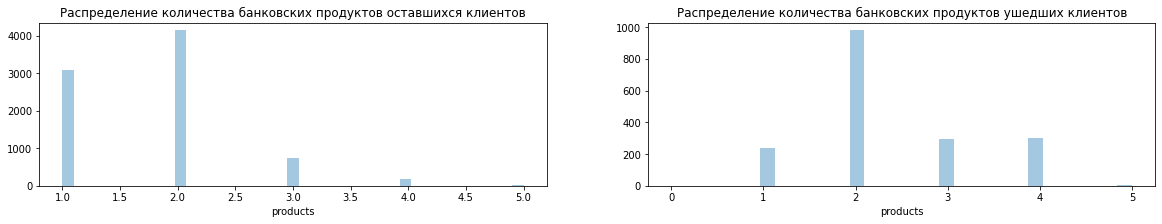

In [50]:
# посмотрим на распределение выборок
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,3))

sns.distplot(df.query('churn == 0')['products'], kde=False, ax=ax1)
ax1.set_title("Распределение количества банковских продуктов оставшихся клиентов")

sns.distplot(df.query('churn == 1')['products'], kde=False, ax=ax2)
ax2.set_title("Распределение количества банковских продуктов ушедших клиентов")

plt.show()

In [51]:
# results = вызов метода для проверки гипотезы

results = st.ttest_ind (
    df[df['churn']==0]['products'],
    df[df['churn']==1]['products'], equal_var = False)

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу
 
print("p-value = ",results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')
       

p-value =  7.537464337201273e-138
Отвергаем нулевую гипотезу


p-value значительно меньше принятого уровня статической значимости (0.05), нулевая гипотеза отвергнута, между клиенатами, которые ушли и теми, которые остались есть статистически значимое различие в количестве используемых банковских продуктов.Эти результаты также совпадают с результатами исследовательского анализа.

### Вывод:

По итогам проведенного статистического анализа можно выделим несколько высокоотточных сегментов пользователей.

В качестве критериев для выделения выберем следующие параметры:

- пол;
- возраст;
- количество баллов собственности;
- количество используемых продуктов.

##  Сегментация пользователей и их приоритезация

**Сегмент №1**

Пол: мужской

Возраст: 46-62

Количество баллов собственности: 5 и меньше


In [52]:
# Рассчитаем общее число пользователей в  сегменте:
print ('Общее число пользователей в сегменте №1:', df.query (
    'male==1 and equity<5 and  age>=46 \
    and age<=62 ')['user_id'].count() )


# Рассчитаем число отточных пользователей в  сегменте:
print ('Число отточных пользователей в сегменте №1:', df.query (
    'male==1 and equity<5 and age>=46 \
    and age<=62 and  churn==1')['user_id'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №1:',round(df.query (
    'male==1 and equity<5 and  age>=46 \
    and age<=62 and  churn==1')['user_id'].count() / df.query (
    'male==1  and equity<5 and age>=46 \
    and age<=62 ')['user_id'].count()*100,2))

Общее число пользователей в сегменте №1: 932
Число отточных пользователей в сегменте №1: 217
Доля отточных пользователей в сегменте №1: 23.28


**Сегмент №2**

Пол: женский

Возраст: 46-62

Количество баллов собственности: 5 и менее


In [53]:
# Рассчитаем общее число пользователей в сегменте:
print ('Общее число пользователей в сегменте №2:', df.query (
    'female==1 and equity<5 and  age>=46 \
    and age<=62 ')['user_id'].count() )


# Рассчитаем число отточных пользователей в сегменте:
print ('Число отточных пользователей в сегменте №2:', df.query (
    'female==1 and equity<5 and age>=46 \
    and age<=62 and churn==1')['user_id'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №2:',round(df.query (
    'female==1 and equity<5 and  age>=46 \
    and age<=62 and  churn==1')['user_id'].count() / df.query (
    'female==1  and equity<5 and age>=46 \
    and age<=62  ')['user_id'].count()*100,2))

Общее число пользователей в сегменте №2: 1170
Число отточных пользователей в сегменте №2: 179
Доля отточных пользователей в сегменте №2: 15.3


**Сегмент №3**

Пол: мужской

Возраст: от 46 до 62

Количество используемых продуктов: менее 3


In [54]:
# Рассчитаем общее число пользователей в  сегменте:
print ('Общее число пользователей в сегменте №3:', df.query (
    'male==1 and  age>=46 \
    and age<=62 and products < 3')['user_id'].count() )


# Рассчитаем число отточных пользователей в  сегменте:
print ('Число отточных пользователей в сегменте №3:', df.query (
    'male==1 and  age>=46 \
    and age<=62 and products < 3 and churn==1')['user_id'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №3:',round(df.query (
    'male==1 and  age>=46 \
    and age<=62 and products < 3 and churn==1')['user_id'].count() / df.query (
    'male==1 and  age>=46 \
    and age<=62 and products < 3')['user_id'].count()*100,2))

Общее число пользователей в сегменте №3: 1016
Число отточных пользователей в сегменте №3: 229
Доля отточных пользователей в сегменте №3: 22.54


**Сегмент №4**

Пол: мужской

Возраст: от 25 до 45

Количество баллов собственности: менее 5


In [55]:
# Рассчитаем общее число пользователей в  сегменте:
print ('Общее число пользователей в сегменте №4:', df.query (
    'male==1 and equity<5 and  age>=25 \
    and age<=45 ')['user_id'].count() )


# Рассчитаем число отточных пользователей в  сегменте:
print ('Число отточных пользователей в сегменте №4:', df.query (
    'male==1 and equity<55 and  age>=25 \
    and age<=45 and  churn==1')['user_id'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №4:',round(df.query (
    'male==1 and equity<5 and  age>=25 \
    and age<=45 and  churn==1')['user_id'].count() / df.query (
    'male==1 and equity<5 and age>=25 \
    and age<=45 ')['user_id'].count()*100,2))

Общее число пользователей в сегменте №4: 2671
Число отточных пользователей в сегменте №4: 778
Доля отточных пользователей в сегменте №4: 17.3


**Сегмент №5**

Пол: мужской

Возраст: от 25 до 45

Количество используемых продуктов: больше 3


In [56]:
# Рассчитаем общее число пользователей в сегменте:
print ('Общее число пользователей в сегменте №5:', df.query (
    'male==1  and age>=25 \
    and age<=45 and products > 3')['user_id'].count() )


# Рассчитаем число отточных пользователей в сегменте:
print ('Число отточных пользователей в сегменте №5:', df.query (
    'male==1 and  age>=25 \
    and age<=45 and products > 3 and churn==1')['user_id'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №5:',round(df.query (
    'male==1 and   age>=25 \
    and age<=45 and  products > 3 and churn==1')['user_id'].count() / df.query (
    'male==1 and   age>=25 \
    and age<=45 and products > 3 ')['user_id'].count()*100,2))

Общее число пользователей в сегменте №5: 227
Число отточных пользователей в сегменте №5: 148
Доля отточных пользователей в сегменте №5: 65.2


**Сегмент №6**

Пол: мужской

Возраст: от 25 до 45

Количество используемых продуктов: менее 3


In [57]:
# Рассчитаем общее число пользователей в сегменте:
print ('Общее число пользователей в сегменте №5:', df.query (
    'male==1  and age>=25 \
    and age<=45 and products < 3')['user_id'].count() )


# Рассчитаем число отточных пользователей в сегменте:
print ('Число отточных пользователей в сегменте №5:', df.query (
    'male==1 and  age>=25 \
    and age<=45 and products < 3 and churn==1')['user_id'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №5:',round(df.query (
    'male==1 and   age>=25 \
    and age<=45 and  products < 3 and churn==1')['user_id'].count() / df.query (
    'male==1 and   age>=25 \
    and age<=45 and products < 3 ')['user_id'].count()*100,2))

Общее число пользователей в сегменте №5: 2945
Число отточных пользователей в сегменте №5: 537
Доля отточных пользователей в сегменте №5: 18.23


### Приоритизация сегментов


1. Наиболее высокая доля отточных клиентов в **сегменте №5** почти **65%** 

Пол: мужской

Возраст: от 25 до 45

Количество используемых продуктов: больше 3

2. Далее идут **сегмент №1 и № 3** -  **23%** ушедших клиентов

**№1** Пол: мужской

Возраст: 46-62

Количество баллов собственности: 5 и меньше



**№3** Пол: мужской

Возраст: от 46 до 62

Количество используемых продуктов: менее 3


3. **Cегмент №6** почти **18%** отточных клиентов

Пол: мужской

Возраст: от 25 до 45

Количество используемых продуктов: менее 3

4. **Сегмент № 4** отточных клиентов **17%**

Пол: мужской

Возраст: от 25 до 45

Количество баллов собственности: менее 5

5. **Сегмент № 2** отточных клиентов **15%**

Пол: женский

Возраст: 46-62

Количество баллов собственности: 5 и менее

##  Итоговые выводы и рекомендации по каждому из сегментов


###  Проведенное исследование показало, что между оттоком клиентов и некоторыми параметрами существует связь.

**К параметрам, влияющим на отток, относятся:**

- **пол пользователя:** мужчины более склонны уходить из банка, чем женщины;


- **возраст пользователя:** наиболее отточные возрастные группы - 46-62 и 25-45;


- **количество баллов собственности:** чем выше оценка собственности, тем больше процент отточных клиентов;


- **баллы кредитного скоринга:** клиенты с баллами кредитного скоринга больше 750, имеют более высокий процент оттока;


- **количество продуктов, которыми пользуется клиент:** клиенты, использовавшие 4 продукта, уходили из банка намного чаще, чем 
  другие;


- **наличие кредитной карты:** отсутствие у клиента кредитной карты сильно повышало риск его оттока из банка;


- **активность пользователя:** более активные клиенты покидали банк чаще, чем менее активные;


###  Был проведен статистический анализ следующих гипотез:

**Гипотеза №1 о различии дохода между теми клиентами, которые ушли и теми, которые остались:** нет статистически значимого различия доходов

**Гипотеза №2 о различие в количестве баллов собственности отточных и оставшихся клиентов:** есть статистически значимое различие в количестве баллов собственности

**Гипотеза №3 о различии в количестве используемых банковских продуктов оставшихся и отточных клиентов:** есть статистически значимое различие в количестве используемых банковских продуктов.


###  Были выделены и приоритизированы сегменты, в наибольшей степени подверженные оттоку

Процент клиентов, подверженных оттоку находится в пределах  от 18-65%.

###  Рекомендации  для отдела маркетинга

1. Информировать о новых банковских продуктах, если в сегменте их меньше двух-трех.


2. Предложить оформить кредитную карту тем у кого нет.


3. Для клиентов пенсионного возраста - предложить льготные условия для перевода пенсии в этот банк.


4. Для клиентов, получающих зарплату на карту другого банка - предложить выгодные условия для перевода зарплаты в этот банк.


5. Предложить повышенный кешбэк на товары для спорта и отдыха (для мужчин) и на товары для дома, одежду и косметику (для   женщин).
